In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [10]:
RATE = 44100
CHUNK = 1024*8

In [42]:
data_dir = "raw_data/teams"
filenames = os.listdir(data_dir)
filenames = sorted(filenames)
filenames[:5]

['raw_signal_teams_10000Hz_20250825_171012.csv',
 'raw_signal_teams_10000Hz_20250825_171019.csv',
 'raw_signal_teams_10000Hz_20250825_171024.csv',
 'raw_signal_teams_1000Hz_20250825_161041.csv',
 'raw_signal_teams_1000Hz_20250825_161054.csv']

In [43]:
def find_peak_in_fft(df):
    audio_data = df["signal"]
    fft_result = np.fft.fft(audio_data)
    fft_result = np.abs(fft_result)[:CHUNK // 2]
    x_freq_data = np.fft.fftfreq(CHUNK, d=1/RATE)[:CHUNK // 2]
    peak_idx = np.argmax(fft_result)
    peak_freq = x_freq_data[peak_idx]
    peak_amp = fft_result[peak_idx]
    return peak_freq, peak_amp

In [44]:
set_freq_list = []
peak_freq_list = []
peak_amp_list = []

for filename in filenames:
    set_freq = filename.split("_")[3][:-2]
    set_freq = int(set_freq)
    
    df = pd.read_csv(os.path.join(data_dir, filename))
    peak_freq, peak_amp = find_peak_in_fft(df)
    
    print(filename, set_freq, peak_freq, peak_amp)
    
    set_freq_list.append(set_freq)
    peak_freq_list.append(peak_freq)
    peak_amp_list.append(peak_amp)
    
result_df = pd.DataFrame({
    "set_freq": set_freq_list,
    "peak_freq": peak_freq_list,
    "peak_amp": peak_amp_list
})

result_df.sort_values("set_freq", inplace=True)
result_df.reset_index(drop=True, inplace=True)
result_df

result_df.to_csv(f"fft_peak_results_{data_dir.split('/')[-1]}.csv", index=False)

raw_signal_teams_10000Hz_20250825_171012.csv 10000 10002.1728515625 37685.923774245886
raw_signal_teams_10000Hz_20250825_171019.csv 10000 10002.1728515625 34537.842588954045
raw_signal_teams_10000Hz_20250825_171024.csv 10000 10002.1728515625 33864.64146173469
raw_signal_teams_1000Hz_20250825_161041.csv 1000 1001.2939453125 46721.88307430264
raw_signal_teams_1000Hz_20250825_161054.csv 1000 1001.2939453125 46889.30547494397
raw_signal_teams_1000Hz_20250825_161058.csv 1000 1001.2939453125 45905.37994625167
raw_signal_teams_100Hz_20250825_161800.csv 100 102.28271484375 32784.54038184306
raw_signal_teams_100Hz_20250825_161815.csv 100 102.28271484375 33006.16926533201
raw_signal_teams_100Hz_20250825_161820.csv 100 102.28271484375 31231.736016721836
raw_signal_teams_10500Hz_20250825_171223.csv 10500 10497.4365234375 33356.63286606507
raw_signal_teams_10500Hz_20250825_171229.csv 10500 10502.81982421875 29578.09216266316
raw_signal_teams_10500Hz_20250825_171234.csv 10500 10497.4365234375 32115.

In [45]:
df_fft_result_teams = pd.read_csv("fft_peak_results_teams.csv")
df_fft_result_original = pd.read_csv("fft_peak_results_original.csv")

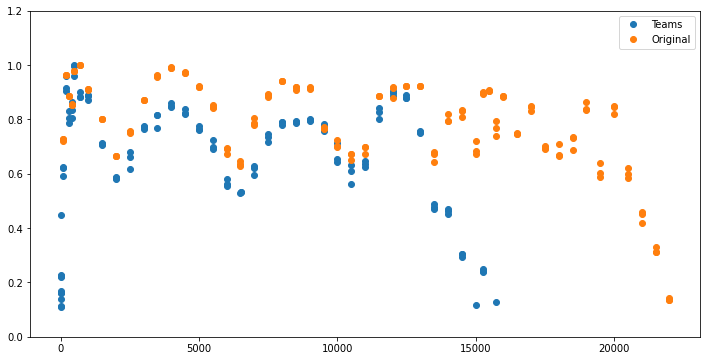

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df_fft_result_teams["peak_freq"], df_fft_result_teams["peak_amp"]/df_fft_result_teams["peak_amp"].max(), label="Teams", marker='o', lw=0)
plt.plot(df_fft_result_original["peak_freq"], df_fft_result_original["peak_amp"]/df_fft_result_original["peak_amp"].max(), label="Original", marker='o', lw=0)
plt.ylim(0, 1.2)
plt.legend()

In [25]:
filename = filenames[0]
set_freq = filename.split("_")[3][:-2]
set_freq = int(set_freq)
print(filename)
print(set_freq)

raw_signal_teams_10000Hz_20250825_171012.csv
10000


In [19]:
filepath = os.path.join(data_dir, filenames[0])
df = pd.read_csv(filepath)
df.head()

,time(s),sigal
0,0.000000,13
1,0.000023,14
2,0.000045,-2
3,0.000068,-7
4,0.000091,7


10002.1728515625 37685.923774245886


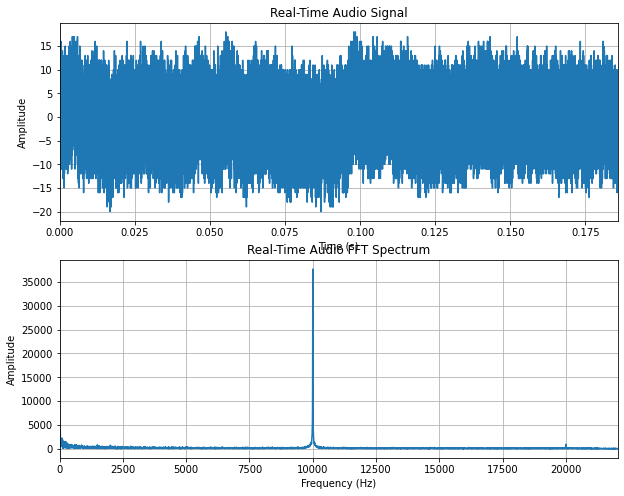

In [21]:
audio_data = df["sigal"]
x_time_data = df["time(s)"]

# FFT of the single chunk
fft_result = np.fft.fft(audio_data)
x_freq_data = np.fft.fftfreq(CHUNK, d=1/RATE)[:CHUNK // 2]
fft_result = np.abs(fft_result)[:CHUNK // 2]

# --- Matplotlib Setup ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Subplot 1: Raw Signal (Time Domain)
x_time_data = np.arange(0, CHUNK) / RATE
ax1.plot(x_time_data, audio_data)
#ax1.set_ylim(-50, 50000)
ax1.set_xlim(0, CHUNK / RATE)
ax1.set_title("Real-Time Audio Signal")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax1.grid()

# Subplot 2: FFT Spectrum (Frequency Domain)
x_freq_data = np.fft.fftfreq(CHUNK, d=1/RATE)[:CHUNK // 2]
fft_result = np.abs(fft_result)[:CHUNK // 2]
ax2.plot(x_freq_data, fft_result)
#ax2.set_ylim(0, 3E8)
ax2.set_xlim(0, RATE / 2)
ax2.set_title("Real-Time Audio FFT Spectrum")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Amplitude")
ax2.grid()

# find peak frequency
peak_idx = np.argmax(fft_result)
peak_freq = x_freq_data[peak_idx]
peak_amp = fft_result[peak_idx]

print(peak_freq, peak_amp)

In [22]:
def find_peak_in_fft(df):
    audio_data = df["sigal"]
    fft_result = np.fft.fft(audio_data)
    fft_result = np.abs(fft_result)[:CHUNK // 2]
    x_freq_data = np.fft.fftfreq(CHUNK, d=1/RATE)[:CHUNK // 2]
    peak_idx = np.argmax(fft_result)
    peak_freq = x_freq_data[peak_idx]
    peak_amp = fft_result[peak_idx]
    return peak_freq, peak_amp

find_peak_in_fft(df)

(10002.1728515625, 37685.923774245886)